Homework Due 4-18

Mathematical Modeling


Noah Wong -5057635

In [40]:
using PyPlot

Chapter 7 Problem 16

In [58]:
#concentration at municipal well, this returns an answer for part (a), the 
Px(x,t) = (3.6/sqrt(t))*e^((-(x + 1800-500*t)^2)/(5000*t))
P(t) = (3.6/sqrt(t))*e^((-(1800-500*t)^2)/(5000*t))
println(Px(0, 3.6))

1.8973665961010278


In [59]:
#This function will determine the time (in years) the municipal's concentration exceeds the safe limit (first_break) and when the concentration goes below the safe level (second_break). It only returns the second break because the question only asks that and it's needed for parts (a) and (b)  
function safe_concentration(min,v,w) 
    first_break = 0
    second_break = 0
    
    for i in (2500:3000)
        t = 0.001*i
        
        C = Pw(t,v,w)
    
        if C > min
            println("t:  ", t, "  P(t) = ", C )
            first_break = i 
            break
        end
    
    end
    
    # starts right where the first loop stopped
    for i in (first_break + 0.001:8000)
        t = 0.001*i
        
        C = Pw(t,v,w)
    
        #switch from greater than to less than on the inequality
        if C < min
            println("t:  ", t, "  P(t) = ", C )
            second_break = i
            break
        end
    
    end
    return 0.001 * second_break
end


safe_concentration (generic function with 3 methods)

In [60]:
#This returns the answer to part (b)
safe_concentration(0.001,500,200)

t:  2.931  P(t) = 0.0010161930621902541
t:  4.411001000000001  P(t) = 0.0009911969667749897


4.411001000000001

In [24]:
#Measuring sensitivity with respect to the groundwater velocity and the width of plume needed for the two sensitivies functions
Pw(t,v,w) = (3.6/sqrt(t))*e^((-(1800-v*t)^2)/(2*(w^2/16)*t)

Pv (generic function with 1 method)

In [61]:
#approximates the sensitivity of when the well is at a safe level determined by the groundwater velocity (v) answer to (c)
function sensitivity_velocity(v)
    
    True_C = safe_concentration(0.001,v,200)
     
    v₀ = v - 0.1
    
    C₀ = safe_concentration(0.001,v₀,200)
    
    sens = ((True_C - C₀)/0.1) * (v/True_C)
    println(sens)
    
end
sensitivity_velocity(500)

t:  2.931  P(t) = 0.0010161930621902541
t:  4.411001000000001  P(t) = 0.0009911969667749897
t:  2.931  P(t) = 0.001002681078625384
t:  4.412001  P(t) = 0.0009906169262485299
-1.1335295548555142


In [63]:
#approximates the sensitivity of when the well is at a safe level determined by the groundwater velocity (v) answer to (d)
function sensitivity_width(w)
    
    True_C = safe_concentration(0.001,500,w)
     
    w₀ = w - 1
    
    C₀ = safe_concentration(0.001,500,w₀)
    
    sens = ((True_C - C₀)/1) * (w/True_C)
    println(sens)
    
end
sensitivity_width(200)


t:  2.931  P(t) = 0.0010161930621902541
t:  4.411001000000001  P(t) = 0.0009911969667749897
t:  2.934  P(t) = 0.0010155703761609049
t:  4.407001  P(t) = 0.0009839573881233802
0.18136472877700308


Chapter 8 Problem 1

In [69]:
#Markov is the transition matrix and Mπ is the steady state distribution
Markov = reshape([0.368,0.368,0.632,0.632],2,2)
Mπ =transpose([1,0])
for i in 0:4
    Mπ = Mπ*Markov
end
println(Mπ)

[0.368 0.632]


In [46]:
#Helps Prob_lost_sale an easier function to write
poisson(λ,x) = (e.^-λ) .* (λ .^ x)/factorial(x) 

poisson (generic function with 1 method)

In [50]:
#Returns the probability the demand will exceed the supply
Prob_lost_sale(λ) = (1 .- (poisson(λ,2) .+ poisson(λ,1) .+ poisson(λ,0))) .* (poisson(λ,0)) .+
                    ((1 .- (poisson(λ,3) .+ poisson(λ,2) .+ poisson(λ,1) .+ poisson(λ,0))) .* (1 .- poisson(λ,0)))

test_λ = Array{Float64, 2}(1,5)
test_λ = [0.75, 0.9, 1.0, 1.1 ,1.25]
test_lost_sale = Array{Float64, 2}(1,5)

1×5 Array{Float64,2}:
 6.92126e-310  6.92126e-310  6.92122e-310  6.92122e-310  6.92126e-310

In [36]:
#this returns the probabilty that demand will exceed the supply for all 5 λ values
for i in 1:5
    test_lost_sale[i] = Prob_lost_sale(test_λ[i])
end
print(test_lost_sale)

[0.022981 0.0335425 0.041544 0.0503217 0.0649894]

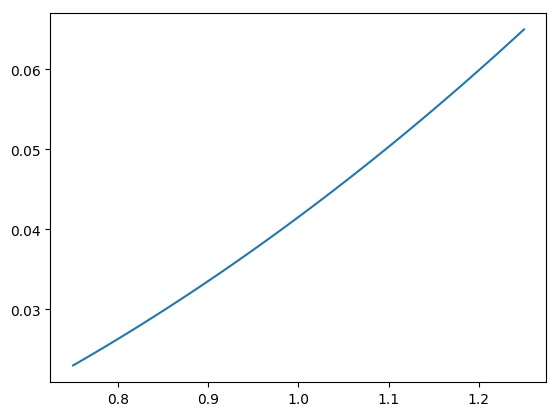

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6863ecaf10>

In [54]:
#Graphes the lambda values from 0.75 to 1.25
t = 0.75:0.01:1.25;
y = Prob_lost_sale(t)
plot(t,y)

In [64]:
#Sensitivity to choice of lambda
function sensitivity2(λ)
    #Finds the probility of the true lambda
    true_p = Prob_lost_sale(λ)
    
    #λ₀ is lambda minus a small increment, used to approximate a derivative
    λ₀ = λ .- 0.001
    
    p₀ = Prob_lost_sale(λ₀)
    
    
    return ((true_p .- p₀)./(0.001)).*(λ./ true_p)
    
end


sensitivity (generic function with 1 method)

In [65]:
sensitivity2(test_λ)

5-element Array{Float64,1}:
 2.10668
 2.04291
 2.01787
 2.00403
 1.99859

Chapter 8 Problem 5

In [80]:
MarketMatrix = reshape([0.9, 0.05, 0.05, 0.02, 0.85, 0.05, 0.08, 0.1, 0.9],3,3)
Market_π = transpose([1/3, 1/3, 1/3])
for i in 0:50
    Market_π = Market_π*MarketMatrix
end
println(Market_π)

[0.333333 0.200002 0.466665]
